In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


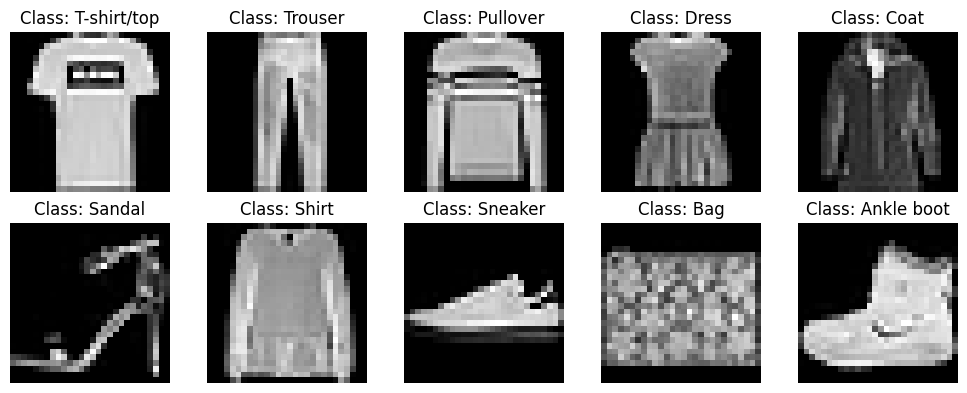

In [ ]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')

plt.tight_layout()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding
num_classes = 10 # There are 10 classes possible
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential() # Declare a Sequential model
model.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model.add(Activation('relu')) # Apply ReLu activation function to the layer output
model.add(Dropout(0.2)) # Dropout helps prevent the model from overfitting on the training data
model.add(Dense(512)) # Add a hidden layer of 512 units
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/25
469/469 [==============================] - 18s 33ms/step - loss: 0.5143 - accuracy: 0.8156 - val_loss: 0.4030 - val_accuracy: 0.8504
Epoch 2/25
469/469 [==============================] - 6s 13ms/step - loss: 0.3816 - accuracy: 0.8602 - val_loss: 0.3711 - val_accuracy: 0.8655
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3477 - accuracy: 0.8720 - val_loss: 0.3644 - val_accuracy: 0.8711
Epoch 4/25
469/469 [==============================] - 6s 13ms/step - loss: 0.3313 - accuracy: 0.8777 - val_loss: 0.3533 - val_accuracy: 0.8717
Epoch 5/25
469/469 [==============================] - 6s 12ms/step - loss: 0.3088 - accuracy: 0.8849 - val_loss: 0.3475 - val_accuracy: 0.8724
Epoch 6/25
469/469 [==============================] - 6s 13ms/step - loss: 0.2993 - accuracy: 0.8883 - val_loss: 0.3341 - val_accuracy: 0.8780
Epoch 7/25
469/469 [==============================] - 6s 12ms/step - loss: 0.2874 - accuracy: 0.8921 - val_loss: 0.3268 - val_accuracy: 0.883

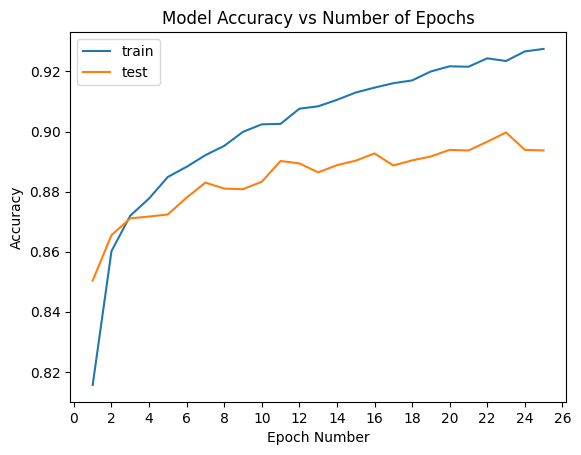

In [ ]:
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()

In [ ]:
best_score = max(history.history['val_accuracy'])
best_epoch = np.array(history.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.899700 at epoch 23


In [ ]:
# y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]


313/313 [==============================] - 1s 2ms/step


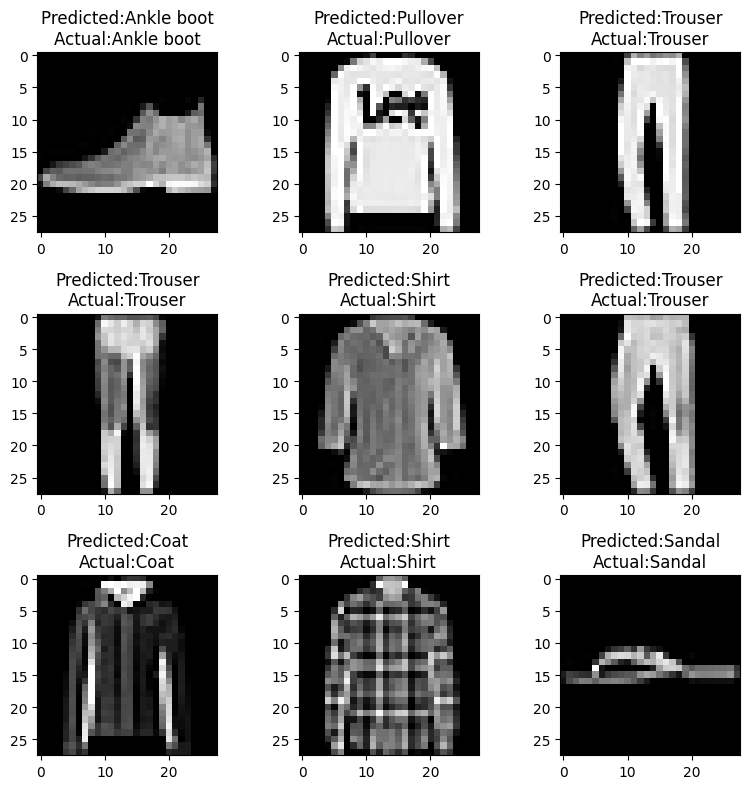

In [ ]:
plt.figure(figsize=(8,8))

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted:{}\nActual:{}".format(class_labels_dict[y_pred[correct]],class_labels_dict[y_test[correct]]))

plt.tight_layout()

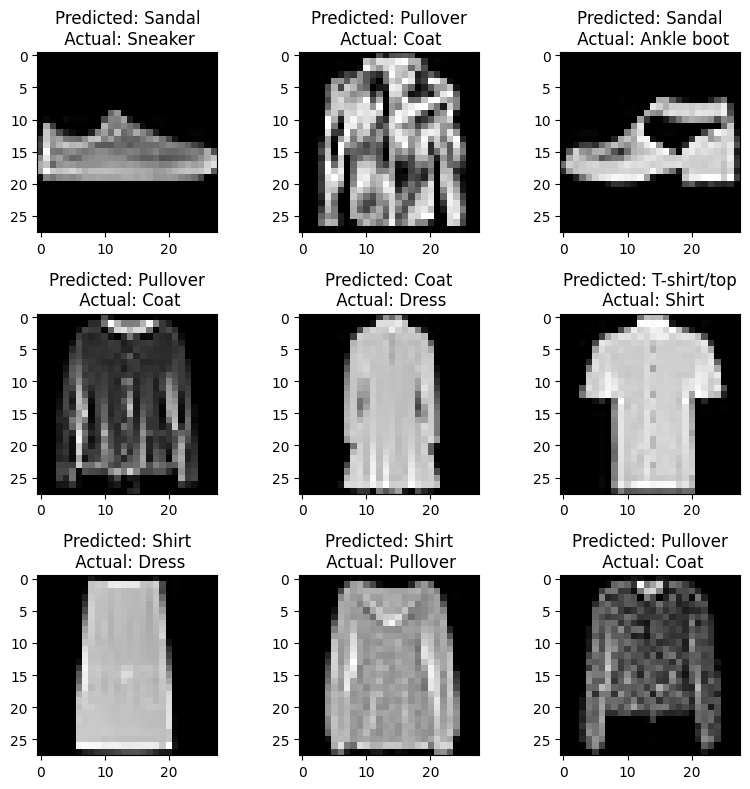

In [ ]:
plt.figure(figsize=(8,8))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\n Actual: {}".format(class_labels_dict[y_pred[incorrect]], class_labels_dict[y_test[incorrect]]))

plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = [class_labels_dict[x] for x in range(0,10)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.79      0.84      0.82      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.83      0.77      0.80      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.72      0.74      0.73      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=target_names, columns=target_names)
matrix.index.name = 'Predicted'
matrix.columns.name = 'Actual'
matrix

Actual,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Predicted,,,,,,,,,,
T-shirt/top,851,3,17,14,6,1,101,0,7,0
Trouser,1,983,0,11,2,0,1,0,2,0
Pullover,16,1,844,7,70,0,61,0,1,0
Dress,20,8,10,897,44,0,18,0,3,0
Coat,0,1,109,20,766,0,103,0,1,0
Sandal,0,0,0,0,0,949,0,20,2,29
Shirt,103,2,80,26,32,0,745,0,12,0
Sneaker,0,0,0,0,0,12,0,954,0,34
Bag,6,0,7,3,3,2,2,2,975,0
